In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statistics

## ERR1977351 case 6 CONTROL

In [3]:
#!/usr/bin/env python3

# Create a script to evaluate quality of vcf file produced by our fastq -> vcf pipeline
# Generate the numbers required to create histograms for read depth and allelic balance from a single VCF
# Generate two lists (variant allele frequencies and variant read depth) for unfiltered VCF, then filter and generate the two lists again.

# Filtering parameters:
# 1) GQ >= 30
# 2) AD1 >= 3 AND AD2 >=3
# 3) DP <= 100

import sys
import statistics

input_vcf = sys.argv[1]
fh = open('/data/project/ERR1977351.arrg.mrkdup.sorted.bam.vcf', "r")

AFs_list = []
DPs_list = []
GQ_filtered_AFs_list = []
GQ_filtered_DPs_list = []
AD_filtered_AFs_list = []
AD_filtered_DPs_list = []
DP_filtered_AFs_list = []
DP_filtered_DPs_list = []
threeX_filtered_AFs_list = []
threeX_filtered_DPs_list = []

for line in fh:
    if not line.startswith('#'):
        line = line.rstrip()
        field10 = line.split("\t")[9]
        elements_in_field10 = len(field10.split(":"))
        if elements_in_field10 == 5:
            AD = field10.split(':')[1]
            DP = int(field10.split(':')[2])
            GQ = int(field10.split(':')[3])
            AD1 = float(AD.split(',')[0])
            AD2 = float(AD.split(',')[1])
            variant_AF = (AD1/(AD1+AD2))
            AFs_list.append(variant_AF)
            DPs_list.append(DP)
            if GQ >= 30:
                GQ_filtered_AFs_list.append(variant_AF)
            if GQ >= 30:
                GQ_filtered_DPs_list.append(DP)
            if AD1 >= 3 and AD2 >= 3:
                AD_filtered_AFs_list.append(variant_AF)
            if AD1 >= 3 and AD2 >= 3:
                AD_filtered_DPs_list.append(DP)
            if DP <= 100:
                DP_filtered_AFs_list.append(variant_AF)
            if DP <= 100:
                DP_filtered_DPs_list.append(DP)
            if GQ >= 30 and AD1 >= 3 and AD2 >= 3 and DP <= 100:
                threeX_filtered_AFs_list.append(variant_AF)
            if GQ >= 30 and AD1 >= 3 and AD2 >= 3 and DP <= 100:
                threeX_filtered_DPs_list.append(DP)

                
#        else:
#            print(line)
            
#        print("{}\t{}\t{}\t{:.4f}".format(AD,AD1,AD2,variant_AF))
# print(AFs_list,DPs_list)
print(len(DPs_list))
print(len(AFs_list))  
print(len(GQ_filtered_AFs_list))
print(len(GQ_filtered_DPs_list))
print(len(AD_filtered_AFs_list))
print(len(AD_filtered_DPs_list))
print(len(DP_filtered_AFs_list))
print(len(DP_filtered_DPs_list))
print(len(threeX_filtered_AFs_list))
print(len(threeX_filtered_DPs_list))

# print(statistics.median(DPs_list))

print(DPs_list)

115870
115870
84509
84509
52636
52636
114668
114668
51554
51554
[4, 17, 2, 13, 79, 62, 20, 89, 108, 49, 125, 36, 50, 8, 7, 5, 99, 78, 53, 11, 38, 88, 20, 56, 5, 5, 4, 5, 67, 21, 31, 19, 8, 6, 34, 9, 79, 34, 36, 12, 112, 89, 39, 3, 9, 2, 3, 3, 2, 11, 23, 10, 3, 13, 23, 3, 4, 4, 4, 18, 4, 2, 3, 4, 15, 16, 5, 30, 10, 7, 3, 4, 8, 11, 13, 3, 12, 2, 10, 4, 2, 7, 6, 4, 6, 8, 10, 14, 8, 3, 20, 5, 3, 10, 21, 4, 12, 8, 9, 3, 12, 6, 5, 2, 4, 32, 30, 9, 6, 7, 7, 21, 19, 5, 49, 23, 25, 40, 17, 14, 9, 12, 63, 27, 44, 44, 7, 31, 13, 3, 15, 25, 10, 44, 22, 8, 16, 14, 3, 2, 13, 8, 20, 12, 2, 24, 6, 7, 5, 4, 7, 4, 21, 18, 14, 12, 21, 5, 2, 3, 10, 28, 5, 9, 19, 26, 9, 19, 18, 12, 5, 22, 15, 6, 2, 3, 22, 24, 35, 10, 12, 9, 27, 8, 9, 13, 43, 13, 21, 8, 3, 3, 9, 2, 8, 4, 13, 5, 2, 3, 3, 2, 31, 7, 10, 7, 18, 42, 20, 15, 3, 2, 6, 4, 8, 23, 18, 40, 46, 7, 19, 20, 3, 21, 12, 50, 24, 23, 11, 8, 25, 14, 10, 2, 16, 8, 10, 25, 16, 7, 5, 21, 43, 13, 13, 2, 3, 3, 7, 13, 20, 9, 20, 28, 10, 9, 14, 10, 38, 44, 33, 17, 7

## Plotting allele depth and balance without filtering VCF file

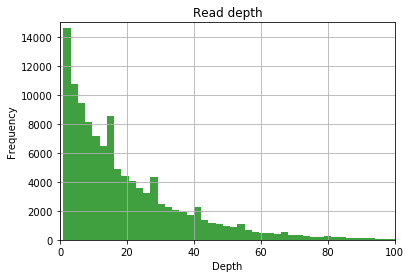

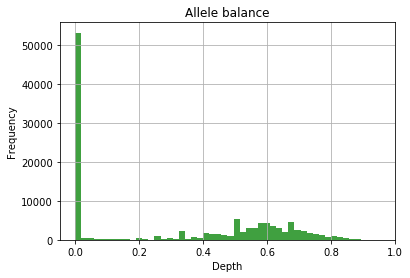

In [4]:
n, bins, patches = plt.hist(DPs_list, 500, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.axis([0, 100,0,15000]) # limiting min and max values on the axes
plt.title('Read depth')

plt.show()
##################
n, bins, patches = plt.hist(AFs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Allele balance')
plt.show()

## Plotting allele depth and balance after filtering VCF file

### Filtering by read depth (DP)

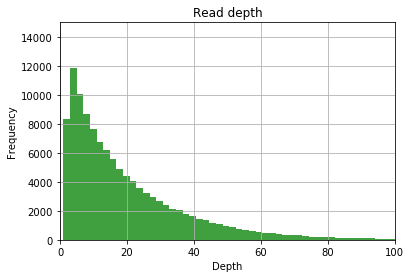

114668


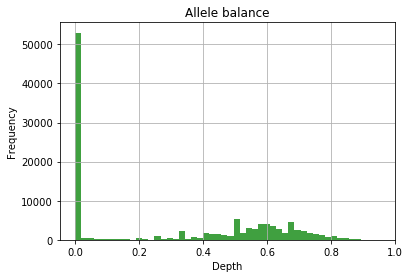

114668


In [5]:
n, bins, patches = plt.hist(DP_filtered_DPs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.axis([0, 100,0,15000]) # limiting min and max values on the axes
plt.title('Read depth')
plt.show()
print(len(DP_filtered_DPs_list))
################
n, bins, patches = plt.hist(DP_filtered_AFs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')

plt.ylabel('Frequency')
plt.grid(True)
plt.title('Allele balance')
plt.show()
print(len(DP_filtered_AFs_list))

### Filtering by read quality (GQ)

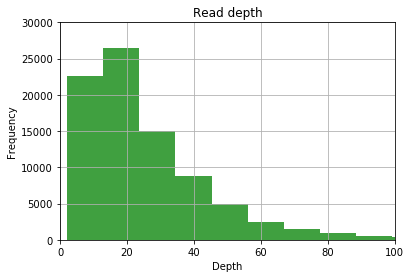

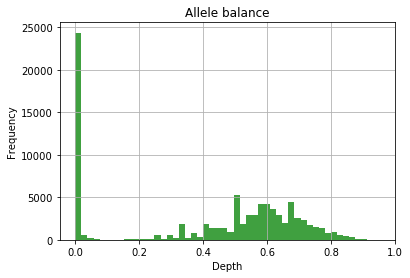

In [6]:
n, bins, patches = plt.hist(GQ_filtered_DPs_list, 100, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.axis([0, 100,0,30000]) # limiting min and max values on the axes
plt.title('Read depth')
plt.show()
################
n, bins, patches = plt.hist(GQ_filtered_AFs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')

plt.ylabel('Frequency')
plt.grid(True)
plt.title('Allele balance')
plt.show()

### Filtering by allele depth (AD)

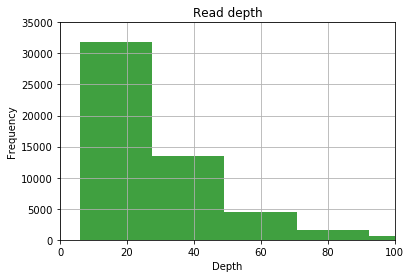

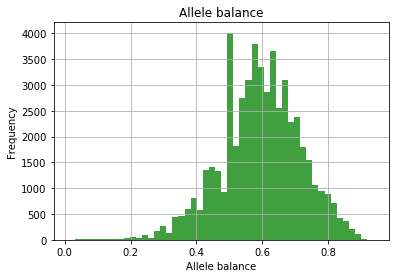

In [9]:
n, bins, patches = plt.hist(AD_filtered_DPs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.axis([0, 100,0,35000]) # limiting min and max values on the axes
plt.title('Read depth')
plt.show()
################
n, bins, patches = plt.hist(AD_filtered_AFs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Allele balance')

plt.ylabel('Frequency')
plt.grid(True)
plt.title('Allele balance')
plt.show()

### Filtering by all (AD/DP/GQ)

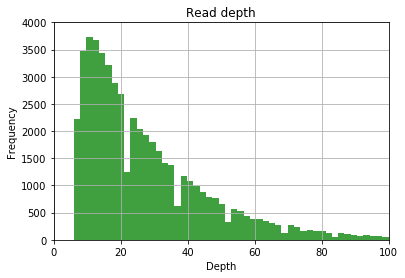

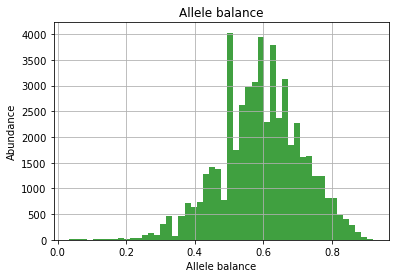

In [10]:
n, bins, patches = plt.hist(threeX_filtered_DPs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.axis([0, 100,0,4000]) # limiting min and max values on the axes
plt.title('Read depth')
plt.show()
################
n, bins, patches = plt.hist(threeX_filtered_AFs_list, 50, facecolor='green', alpha=0.75)
plt.xlabel('Allele balance')

plt.ylabel('Frequency')
plt.grid(True)
plt.title('Allele balance')
plt.show()